In [ ]:
#this is just one of the domains to load this process will evrntually be more automatix
path='balltube/35_2_2_0.3_0.1'

with open(path+'/bdata.txt', 'r') as f:
    bda = f.readline().split(',')
    #bda=map(float, bda[:-1])
with open(path+'/mnums.txt', 'r') as f:
    nums = f.read().splitlines()
    ends0, evals, modes=map(int,nums[:3])
    lengths0= map(float,nums[-2:])
    ends=int(bda[0])
lengths=map(float,bda[1+4*ends:-1])
with open(path+'/ppmcalcsize.txt', 'r') as f:
    bda=f.read().splitlines()
    modes1 ,pp, ends1=int(bda[0]),float(bda[1]),int(bda[2])

    
if (ends0==ends and ends==ends1):
    print(ends,'ends ok')
else:
    print('ends mismatch, something is wrong')
    
if (lengths==lengths0):
    print(lengths,'lengths ok')
else:
    print('lengths mismatch, something is wrong')
    
if (modes==modes1):
    print(modes,'modes ok')
else:
    print('modes mismatch, something is wrong')
    
print(evals)

rmodes=modes
revals=evals


with open(path+'/ppmndfcs.txt', 'r') as f:
   ndm04 = map(float,f.read().splitlines())
   ndm04= column_matrix(RDF,modes*ends,ndm04)
   
rndm04=ndm04
   
with open(path+'/meval.txt', 'r') as f:
   mus = map(float,f.read().splitlines())

rmus = mus   
   
with open(path+'/mevec.txt', 'r') as f:
   mevec = map(float,f.read().splitlines())
   mevec =  matrix(CDF,evals,mevec)
   
rmevec=mevec
rmevecT=rmevec.T

zeros=[0 for i in range(ndm04.nrows())]
rzeros=[0 for i in range(ndm04.nrows())]
zeromodes=[[0] for i in range(ends)]
smdim=len(flatten(zeromodes))
zeropoz=[]
dzeropoz=[]
kernelpoz=[]
dkernelpoz=[]    
mmlengths=[j for j in lengths for i in range(1,rmodes)]
mmevs=[i for j in lengths for i in range(0,rmodes-1)]
DZEROV=zero_vector(2*ends*rmodes)
ZEROV=zero_vector(ends*rmodes)

def ndm(l):
    components(x)=(pp-l)/(l*pp-l*x-pp*x+x^2)
    co=map(components,mus)
    return ndm04-(mevec.T)*diagonal_matrix(CDF,co)*mevec


def dndm(l):
   components(x)=-1/(x-l)^2
   co=map(components,mus)
   return (mevec.T)*diagonal_matrix(CDF,co)*mevec    
    
def ndm0(l):
   components(x)=1/(x-l)
   co=map(components,mus)
   return (mevec.T)*diagonal_matrix(CDF,co)*mevec
   
def mm(l):
   f(x,y)=1/(I*sqrt(l-(x*pi/y)^2))
   return diagonal_matrix(CDF,flatten([map(f(x,i),srange(modes)) for i in lengths]))
   
def dmm(l):
   f(x,y)=-(I*sqrt(l-(x*pi/y)^2))
   return diagonal_matrix(CDF,flatten([map(f(x,i),srange(modes)) for i in lengths]))

#BIG weakness here need to adapt to differetn lengths
def diagdiff(l):
   f=lambda y:I*sqrt(l-(y*pi/2)^2)
   if imaginary(l)<0:
       return -diagonal_matrix(CDF,map(f,flatten(zeromodes)))
   else:
       return diagonal_matrix(CDF,map(f,flatten(zeromodes)))
   

  

def rndm(l):
    components=lambda x:(pp-l)/(l*pp-l*x-pp*x+x^2)
    co=diagonal_matrix(CDF,map(components,rmus))
    return rndm04-(rmevecT)*co*rmevec


   

def drndm(l):
    components=lambda x:1/((l-x)^2)
    co=diagonal_matrix(CDF,map(components,rmus))
    return (rmevecT)*co*rmevec


   
  
def rmm(l):
   f=lambda x,y: 1/(I*sqrt(l-(x*pi/y)^2))
   return diagonal_matrix(CDF,map(f,mmevs,mmlengths))



def drmm(l):
   f=lambda x,y:-I*sqrt(l-(x*pi/y)^2)
   return diagonal_matrix(CDF,map(f,mmevs,mmlengths))
   


class change(object):    
    @staticmethod
    def numbers(rm,rev):
        int(rev)
        int(rm)
        global rmodes
        global revals
        global rndm04
        global rmevec
        global rmevecT
        global rmus
        global rzeros
        global mmlengths
        global mmevs
        global DZEROV
        global ZEROV
        rmus = mus[:rev]
        rmodes=rm
        revals=rev
        modetrimmer=flatten([map(lambda m : m+i*modes,range(rm)) for i in range(ends)])
        rndm04=ndm04.matrix_from_rows_and_columns(modetrimmer,modetrimmer)
        rmevec=mevec.submatrix(row=0,nrows=rev)
        rmevec=rmevec.matrix_from_columns(modetrimmer)
        rmevecT=rmevec.T
        rzeros=[0 for i in range(rndm04.nrows())]
        change.modes(zeromodes)
        mmlengths=[j for j in lengths for i in range(0,rmodes)]
        mmevs=[i for j in lengths for i in range(0,rmodes)]
        DZEROV=zero_vector(2*ends*rmodes)
        ZEROV=zero_vector(ends*rmodes)
        
    @staticmethod
    def modes(zm):
        global r0mevec
        global r0ndm04
        global zeropoz
        global dzeropoz
        global zeromodes
        global kernelpoz
        global dkernelpoz
        zeromodes=zm
        global smdim
        zeropoz=[]
        
        test0=[0 for i in range(rmodes*ends)]
        test0col=[0 for i in range(revals)]
        test0=[0 for i in range(rmodes*ends)]
        test0col=[0 for i in range(revals)]
        r0mevec=deepcopy(rmevec)
        r0ndm04=deepcopy(rndm04)
        for i in range (0,ends):
            for j in zm[i]: 
                r0mevec.set_column((i*rmodes)+j,test0col)
                r0ndm04.set_row((i*rmodes)+j,test0)
                zeropoz.append((i*rmodes)+j)
        kernelpoz=[rmodes*ends-i-1 for i in range(len(zeropoz)) ]
        smdim=len(flatten(zeromodes))
        kernelpoz.reverse()
        dkernelpoz=map(lambda x:x+rmodes*ends,kernelpoz)
        dzeropoz=map(lambda x:x+rmodes*ends,zeropoz)
        

   

def xxxn(l):
    killer=map(lambda m :m*modes,range(ends))
    return (ndm(l)-mm(l)).delete_columns(killer).delete_rows(killer)
    

def rxxxn(l):
    killer=map(lambda m :m*rmodes,range(ends))
    return (rndm(l)-rmm(l)).delete_columns(killer).delete_rows(killer)
    

   
#this returns the scattering matrix: 
def sm(l):
    srndm=rndm(l)
    srmm=rmm(l)
    dd=diagdiff(l)
    rxxxs=srndm-srmm
    for i in zeropoz: rxxxs.set_row(i,ZEROV) 
    
    W=(rxxxs.SVD()[2]).matrix_from_columns(kernelpoz)
    
    basis1=W.matrix_from_rows(zeropoz)
    basis2=(srndm*W).matrix_from_rows(zeropoz).inverse()
    psm=basis1*basis2
    return (psm-dd).inverse()*(psm+dd)
    


 
#this returns the scattering matrix: dsm(l)[0] and its first derivative dsm(l)[1] given the number of modes, modes, and evalues supplied
def dsm(l):
    
    zb=matrix(rmodes*ends)
    
    irndm=rndm(l)
    idrndm=drndm(l)
    idintsystem = irndm.augment(zb).stack((idrndm).augment(irndm))
    
    irmm=rmm(l)
    idrmm=drmm(l)
    idrmmsys=(-idrmm.augment(zb).stack((0.5*irmm).augment(idrmm))).inverse()
    
    svdoutput =idintsystem-idrmmsys
    for i in zeropoz: svdoutput.set_row(i,DZEROV) 
    
    dd=diagdiff(l)
    ddtwo=-0.5*dd.inverse()
    W=(svdoutput.SVD()[2]).matrix_from_columns(dkernelpoz)
    A=[W.matrix_from_rows(zeropoz),W.matrix_from_rows(dzeropoz)]
    WB=idintsystem*W
    B=[WB.matrix_from_rows(zeropoz).inverse(),WB.matrix_from_rows(dzeropoz).inverse()]
    P=[A[0]*B[0],A[1]*B[1]]
    S=(P[0]-dd).inverse()*(dd+P[0])
    D=(P[1]-dd).inverse()*(ddtwo*S+ddtwo)
    return [S,D]

In [1]:
@parallel
def jacabi(l):
    idsm=dsm(l)
    return (idsm[0].inverse()*idsm[1]).trace()


#@parallel
#def jacabi(l):
#    return (1/(l-1.2-1.2*I))+(1/(l-1.2-1.8*I))

#simpsons rule for numerical integaration of the function jacobi between points a and b
#density increases the number of sampling points
def npsimpsonator(a,b,density):
    simpnum=2*max(int(abs(b-a))*density*2+1,3)
    #print(simpnum)
    h=(b-a)/simpnum
    iptb=[a+i*h for i in xrange(0,simpnum+1)]
    #print(iptb)
    evenindices=[a+(i+1)*h for i in xrange(1,simpnum-1,2)]
    oddindices=[a+i*h for i in xrange(1,simpnum+1,2)]
    #print(oddindices)
    #print(evenindices)
    jacs=[]
    for i in evenindices:
        jacs.append(2*jacabi(i))  
    for i in oddindices:
        jacs.append(4*jacabi(i))  
    jacs.append(jacabi(a))
    jacs.append(jacabi(b))        
    #print(jacs)
    return (h/3)*sum(jacs)

#thisis much faster if the function being integrated over takes a while to calculate
def parsimpsonator(a,b,density):
    simpnum=2*max(int(abs(b-a))*density*2+1,3)
    h=(b-a)/simpnum
    iptb=[a+i*h for i in xrange(0,simpnum+1)]
    #print(iptb)
    evenindices=[a+(i+1)*h for i in xrange(1,simpnum-1,2)]
    oddindices=[a+i*h for i in xrange(1,simpnum+1,2)]
    #print(oddindices)
    #print(evenindices)
    sumtab=jacabi(a)
    ejacs=jacabi(evenindices) 
    ojacs=jacabi(oddindices) 
    for i in evenindices:
        sumtab += 2*ejacs.next()[1]
    for i in xrange(0,len(oddindices)): 
        sumtab += 4*ojacs.next()[1] 
    sumtab+=jacabi(b)        
    #print(sumtab)
    return (h/3)*sumtab

#an attempt to make the above a bit faster but doesn't really work very well as summing several thousand
#scalar numbers is already quite quick
def parsimpsonator2(a,b,density):
    simpnum=2*max(int(abs(b-a))*density*2+1,3)
    h=(b-a)/simpnum
    iptb=[a+i*h for i in xrange(0,simpnum+1)]
    #print(iptb)
    evenindices=[a+(i+1)*h for i in xrange(1,simpnum-1,2)]
    oddindices=[a+i*h for i in xrange(1,simpnum+1,2)]
    #print(oddindices)
    #print(evenindices)
    sumtab=[jacabi(a)]
    ejacs=jacabi(evenindices) 
    ojacs=jacabi(oddindices) 
    for i in evenindices:
        sumtab.append(2*ejacs.next()[1])
    for i in xrange(0,len(oddindices)): 
        sumtab.append(4*ojacs.next()[1]) 
    sumtab.append(jacabi(b))        
    #print(sumtab)
    return (h/3)*sum(sumtab)

(2, 'ends ok')
([2.0, 2.0], 'lengths ok')
(20, 'modes ok')
1000


In [20]:
class scattering:
    def __init__(self,modecont,modes,evals):
        self.modecont=modecont
        self.modes=modes
        self.evals=evals


In [21]:
smtest=scattering([[0],[0]],20,1000)

In [24]:
smtest.evals

1000

In [2]:
change.modes([[0],[0]])
change.numbers(20,1000)
#mrsimsum(2+I,3+I,10)

#pretty_print(altrmm(2.3))
#pretty_print(rmm(2.3))
#timeit('simsum(2+I,3+I,10)',number=1,repeat=1)
#timeit('dsm(2+I)')
dsm(1.4)[1]

[0.11590192047050604 - 0.17896060717200218*I   0.5258358556944522 + 0.6598010561414667*I]
[  0.5258358556901446 + 0.6598010561396508*I 0.11590192825346494 - 0.17896060680461134*I]

In [3]:
pretty_print(dsm(2.3+I))

[
[0.027622197644196943 - 0.14846057353753397*I   0.4952317093399213 + 0.02456326552986764*I]  [-190231836062796.53 + 20104905966770.047*I   -123244621006287.3 - 294552487318659.8*I]
[  0.495231709336383 + 0.024563265529241707*I  0.027622206196942875 - 0.1484605635602065*I], [  177798640357156.6 + 29582142266871.195*I   150046677254953.28 + 189284426411742.3*I]
]

In [162]:
change.modes([[0],[0]])
change.numbers(10,600)


In [6]:
S = RecursivelyEnumeratedSet( [[]], lambda l: [l+[0], l+[1]] if len(l) < 16 else [], structure='forest', enumeration='depth')
S

An enumerated set with a forest structure

In [82]:
#This performs numerical contour integration of whatever function is set as jacobi about a given number of
#subdivisions of a set area
#rmin, rmax, the maximum and minimum real values for the contour area same thing for imin and imax
#rni and ini are the number of subdivisions 
#density controls the level of accuracy of npsimpsonator
#the output will be a list containing smaller contours able to be fed back into this function alongside the 
#outcome of the integration
def fastgrid(rmin,rmax,rni,imin,imax,ini,density):
    rh=(rmax-rmin)/rni
    ih=(imax-imin)/ini
    values=[[rmin+x*rh +imin*I +ih*y*I for x in range(0,rni+1)] for y in range(0,ini+1)]
    #squares=horizintervals[0][0]-horizintervals[1][0]+vertintervals[0][0]-vertintervals[0][1]
    vertintervals=[[npsimpsonator(values[y][x],values[y+1][x],density) for x in range(0,rni+1)] for y in range(0,ini)]
    horizintervals=[[npsimpsonator(values[y][x],values[y][x+1],density) for x in range(0,rni)] for y in range(0,ini+1)]
    output=[]
    for x in range(0,rni):
        for y in range(0,ini):
            output.append([[values[x][y].real(),values[x+1][y+1].real(),2,values[x][y].imag(),values[x+1][y+1].imag(),2,density],horizintervals[x][y]-horizintervals[x+1][y]-vertintervals[x][y]+vertintervals[x][y+1]])
    
    output=filter(lambda x:x[1].imag()>0.5,output)
    return output
fastgrid(1,2,2,1,2,2,5)

[[[1, 3/2, 2, 1, 3/2, 2, 5], -3.58237826636465e-6 + 6.28238818921376*I],
 [[1, 3/2, 2, 3/2, 2, 2, 5], 3.58237826636465e-6 + 6.28238818921376*I]]

In [ ]:
#fully automate this: to do
xxx=fastgrid(1,2,2,1,2,2,5)
def fastgrid_multiple_areas(areas):
    output=[]
    for x in areas:
        output.append(apply(fastgrid,x[0]))
    return [op[0] for op in output]


In [161]:
xxx=fastgrid_multiple_areas(fastgrid(1,2,2,1,2,2,5))
for i in range(0,5):
    print(fastgrid_multiple_areas(xxx))

[[[9/8, 5/4, 2, 9/8, 5/4, 2, 5], 6.87837564683491e-11 + 6.28236168753058*I], [[9/8, 5/4, 2, 7/4, 15/8, 2, 5], -6.87838119795003e-11 + 6.28236168753058*I]]
[[[9/8, 5/4, 2, 9/8, 5/4, 2, 5], 6.87837564683491e-11 + 6.28236168753058*I], [[9/8, 5/4, 2, 7/4, 15/8, 2, 5], -6.87838119795003e-11 + 6.28236168753058*I]]
[[[9/8, 5/4, 2, 9/8, 5/4, 2, 5], 6.87837564683491e-11 + 6.28236168753058*I], [[9/8, 5/4, 2, 7/4, 15/8, 2, 5], -6.87838119795003e-11 + 6.28236168753058*I]]
[[[9/8, 5/4, 2, 9/8, 5/4, 2, 5], 6.87837564683491e-11 + 6.28236168753058*I], [[9/8, 5/4, 2, 7/4, 15/8, 2, 5], -6.87838119795003e-11 + 6.28236168753058*I]]
[[[9/8, 5/4, 2, 9/8, 5/4, 2, 5], 6.87837564683491e-11 + 6.28236168753058*I], [[9/8, 5/4, 2, 7/4, 15/8, 2, 5], -6.87838119795003e-11 + 6.28236168753058*I]]


In [343]:
#implements newton's on dsm, starting at l to n iterations
#WARNING, need to be around 3dp from some of the weaker resonances otherwise will overshoot.
#possibility of throttling this back, but have not done so as the requited accuracy can be easily acieved with the
#'lion hunting' algorithm
def nrm(l,n):
    x=l
    d=dsm(x)
    for i in range(0,n):
        print(x)
        x=x-1/((d[0].inverse())*d[1]).trace()
        d=dsm(x)
        print(x)
        if x==0:
            break
    return x

In [295]:
smdet=lambda x:(dsm(x)[0].det()).real()
x=[2.26+0.0005*i +0.0003*I  for i in range(0,100)]
y=map(smdet,x)

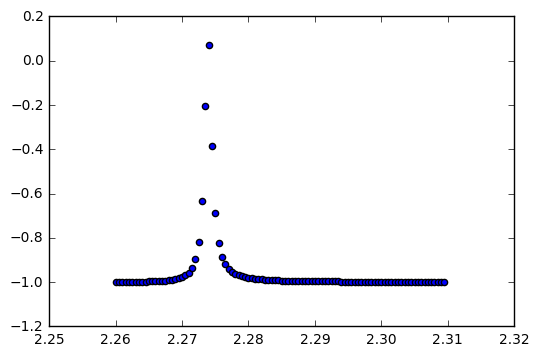

In [296]:
import matplotlib.pyplot as plt
xr=map(lambda l:l.real(),x)
plt.scatter(xr,y)
plt.show()

In [314]:
tm=matrix([[1,2],[3,4]])

In [315]:
tm.inverse()

[  -2    1]
[ 3/2 -1/2]

In [ ]:
1/Tr[(Inverse[
TSM[temp[[nn - 1]], evals, modes, 1, mcontrol][[1]]]).(TSM[
temp[[nn - 1]], evals, modes, 2, mcontrol][[2]])]

In [ ]:
1/(Tr[(Inverse[
TSM[temp[[aa]], evals, modes, 1, mcontrol][[1]]]).(TSM[
temp[[aa]], evals, modes, 2, mcontrol][[2]])] 